# IMPORTE DE LIBRERIAS

In [1]:
from  pylsl import StreamInlet, resolve_stream
import numpy as np
import time 
import matplotlib.pyplot as plt
from matplotlib import style 
from collections import deque
from numpy.fft import fft, fftfreq

from scipy import signal
import scipy.fft

FUNCIONES A EMPLEAR 

In [2]:
from scipy.signal import butter, lfilter

def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='bandpass')
    return b, a


def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

def adaptar_señal(channel_data):
    channel_0 = channel_data[0]
    channel_1 = channel_data[1]
    channel_2 = channel_data[2]

    c_0 = channel_0[8:]
    c_1 = channel_1[8:]
    c_2 = channel_2[8:]

    c_0 = np.asarray(c_0)
    c_1 = np.asarray(c_1)
    c_2 = np.asarray(c_2)

    cannal_0 = []
    for i in range(248):
        for j in range(8):
            cannal_0.append(c_0[i][j])

    cannal_1 = []
    for i in range(248):
        for j in range(8):
            cannal_1.append(c_1[i][j])

    cannal_2 = []
    for i in range(248):
        for j in range(8):
            cannal_2.append(c_2[i][j])
    
    return cannal_0 , cannal_1 , cannal_2

def graficar_canales(señal1, señal2, señal3, señal4):
    fig = plt.figure(figsize=(15,10))
    fig.tight_layout()

    color =['','red','green','blue','yellow']

    for i in range(1,4):
        ax = plt.subplot(4,3,i)
        ax.plot(señal1[i-1],color=color[1])

        ax = plt.subplot(4,3,i+3)
        ax.plot(señal2[i-1],color=color[2])

        ax = plt.subplot(4,3,i+6)
        ax.plot(señal3[i-1],color=color[3])

        ax = plt.subplot(4,3,i+9)
        ax.plot(señal4[i-1],color=color[4])

# TOMA DE DATOS

In [13]:
FFT_MAX_HZ  =  60

HM_SECONDS  =  100   # esto es aproximado. No 100%. no dependas de esto.
TOTAL_ITERS  =  HM_SECONDS * 25   # ~25 iters/seg

last_print = time.time()
fps_counter = deque(maxlen=150)

print("buscando la transmicion EEG....")
streams = resolve_stream('type','EEG')

inlet = StreamInlet(streams[0])



channel_data= {}
#channel_data1 = {} 
#channel_data2 = {}
#channel_data3 = {}

for i in range(TOTAL_ITERS):

    

    for i in range(3):
        sample, timestamp = inlet.pull_sample()

        if i not in channel_data:
            channel_data[i] = sample 
        else:
            channel_data[i].append(sample[:FFT_MAX_HZ])
        
    
    fps_counter.append(time.time() - last_print)
    last_print = time.time()
    cur_raw_hz = 1/(sum(fps_counter)/len(fps_counter))
    print(cur_raw_hz)

buscando la transmicion EEG....


1.7829779184370105
3.5596186544785016
5.339427981717752
6.850938771110049
8.563673463887561
10.276408156665074
11.50810737926731
13.152122719162639
14.79613805905797
16.4401533989533
15.955088026044185
17.405550573866385
18.856013121688584
19.37884217203136
20.76304518431931
22.147248196607265
22.744558693824953
24.082473911108774
25.420389128392593
26.758304345676414
27.06893235838889
28.276070993326183
29.56134694756828
28.621343157417066
29.813899122309444
31.006455087201825
31.270948578346086
32.42913185902557
33.587315139705055
34.745498420384536
34.44349185611148
35.554572238566685
36.6656526210219
35.965944336472944
37.023766228722145
38.081588120971354
38.198568537459586
39.23096228171526
40.2415449334547
41.273379418927895
40.504097364459106
41.49200217822641
42.43749604402364
41.41103060746631
42.352190393999635
43.29335018053296
43.3774014568987
44.30032489215186
45.22324832740503
46.1461717626582
45.36328972939317
46.25276599859696
47.142242267800746
46.50720547016971
47.36

arriba

In [15]:
channel_0 = channel_data[0]
channel_1 = channel_data[1]
channel_2 = channel_data[2]

derecha

In [8]:
channel_01 = channel_data1[0]
channel_11 = channel_data1[1]
channel_21 = channel_data1[2]

abajo

In [10]:
channel_02 = channel_data2[0]
channel_12 = channel_data2[1]
channel_22 = channel_data2[2]

izquierda

In [12]:
channel_03 = channel_data3[0]
channel_13 = channel_data3[1]
channel_23 = channel_data3[2]

GRAFICA DE LOS DATOS

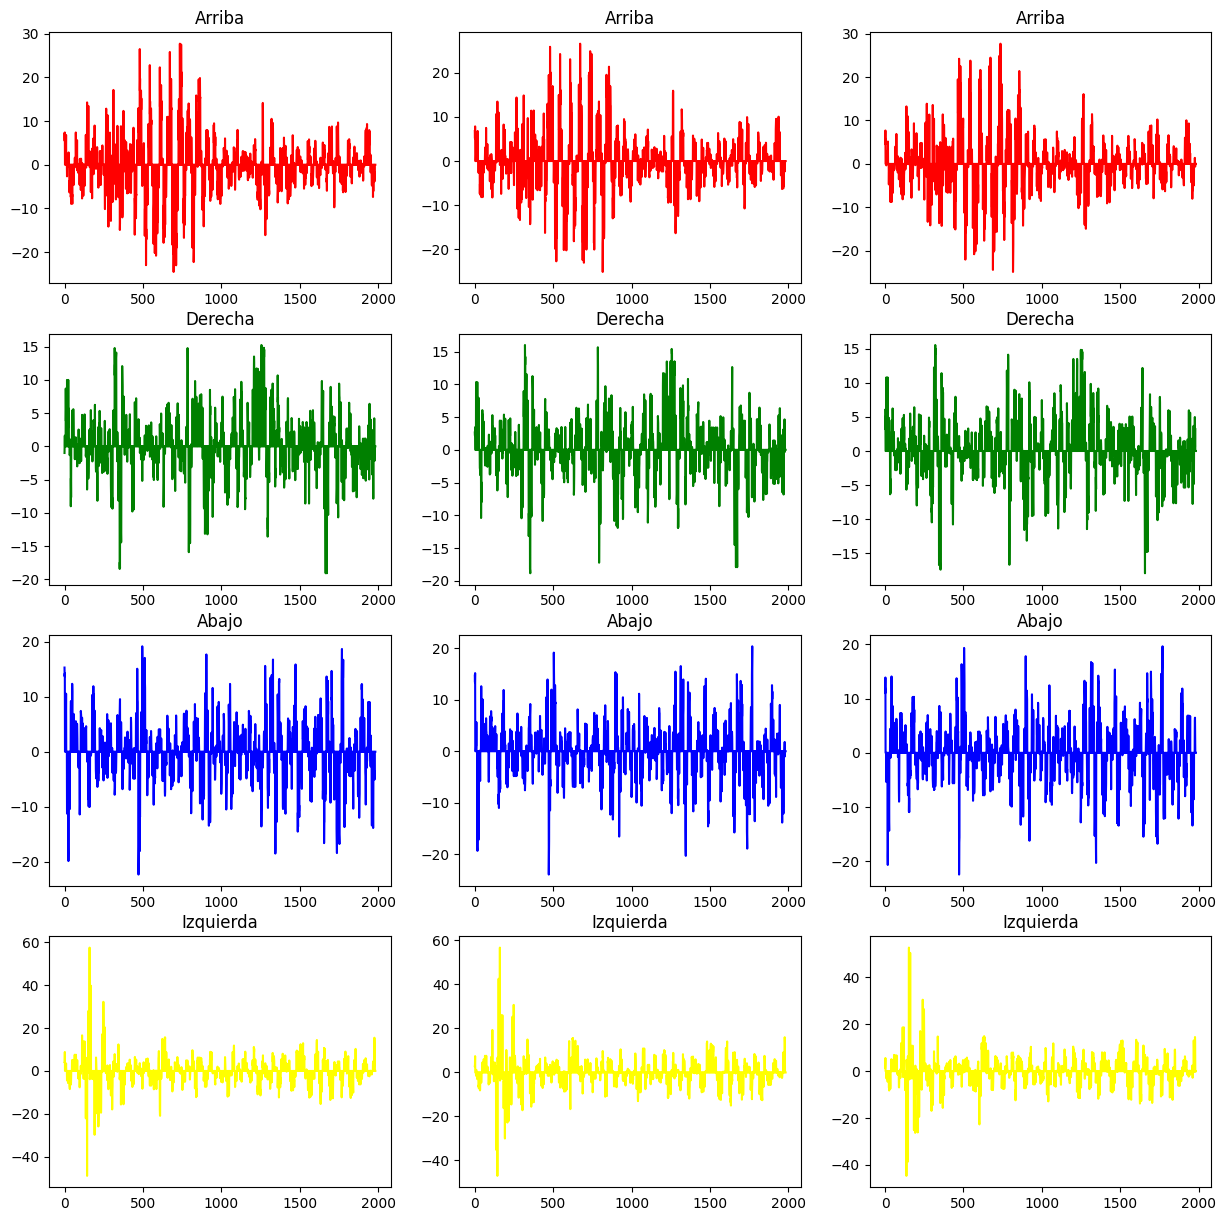

In [16]:
arriba = []
derecha = []
abajo = []
izquierda = []

fig = plt.figure(figsize=(15,15))
fig.tight_layout()

arriba = adaptar_señal(channel_data=channel_data)
derecha = adaptar_señal(channel_data=channel_data1)
abajo = adaptar_señal(channel_data=channel_data2)
izquierda = adaptar_señal(channel_data=channel_data3)

color =['','red','green','blue','yellow']

for i in range(1,4):
    ax = plt.subplot(4,3,i)
    ax.plot(arriba[i-1],color=color[1])
    plt.title('Arriba')

    ax = plt.subplot(4,3,i+3)
    ax.plot(derecha[i-1],color=color[2])
    plt.title('Derecha')

    ax = plt.subplot(4,3,i+6)
    ax.plot(abajo[i-1],color=color[3])
    plt.title('Abajo')

    ax = plt.subplot(4,3,i+9)
    ax.plot(izquierda[i-1],color=color[4])
    plt.title('Izquierda')
    

CALCULAR LA TRANSPUESTA DE LOS DATOS 

In [17]:
import pandas as pd

arriba_np = np.asarray(arriba)
derecha_np = np.asarray(derecha)
abajo_np = np.asarray(abajo)
izquierda_np = np.asarray(izquierda)

arriba_np = np.transpose(arriba_np)
derecha_np = np.transpose(derecha_np)
abajo_np = np.transpose(abajo_np)
izquierda_np = np.transpose(izquierda_np)

arriba_df = pd.DataFrame(arriba_np)
derecha_df = pd.DataFrame(derecha_np)
abajo_df = pd.DataFrame(abajo_np)
izquierda_df = pd.DataFrame(izquierda_np)



GUARDADO DE LOS DATOS EN CSV

In [18]:
arriba_df.to_csv("arriba",index=0,sep=';')
derecha_df.to_csv("derecha",index=0,sep=';')
abajo_df.to_csv("abajo",index=0,sep=';')
izquierda_df.to_csv("izquierda",index=0,sep=';')

In [6]:
import pandas as pd
arriba = []
arriba = adaptar_señal(channel_data=channel_data)

arriba_np = np.asarray(arriba)
arriba_np = np.transpose(arriba_np)
arriba_df = pd.DataFrame(arriba_np)
arriba_df.to_csv("reposo",index=0,sep=';')


# INCORPORACION DE LOS FILTROS 

FILTRO PASA BANDA DE 0.4 A 30 

In [13]:
arribaF = []
derechaF = []
abajoF = []
izquierdaF = []

fs = 250
lowcut = 0.4
highcut = 30

cannal_0_fA=butter_bandpass_filter(arriba[0] , lowcut, highcut, fs,order=6)
cannal_1_fA=butter_bandpass_filter(arriba[1] , lowcut, highcut, fs,order=6)
cannal_2_fA=butter_bandpass_filter(arriba[2] , lowcut, highcut, fs,order=6)

cannal_0_fD=butter_bandpass_filter(derecha[0] , lowcut, highcut, fs,order=6)
cannal_1_fD=butter_bandpass_filter(derecha[1] , lowcut, highcut, fs,order=6)
cannal_2_fD=butter_bandpass_filter(derecha[2] , lowcut, highcut, fs,order=6)

cannal_0_fB=butter_bandpass_filter(abajo[0] , lowcut, highcut, fs,order=6)
cannal_1_fB=butter_bandpass_filter(abajo[1] , lowcut, highcut, fs,order=6)
cannal_2_fB=butter_bandpass_filter(abajo[2] , lowcut, highcut, fs,order=6)

cannal_0_fI=butter_bandpass_filter(izquierda[0] , lowcut, highcut, fs,order=6)
cannal_1_fI=butter_bandpass_filter(izquierda[1] , lowcut, highcut, fs,order=6)
cannal_2_fI=butter_bandpass_filter(izquierda[2] , lowcut, highcut, fs,order=6)

arribaF = np.vstack((cannal_0_fA, cannal_1_fA,cannal_2_fA))
derechaF = np.vstack((cannal_0_fD, cannal_1_fD,cannal_2_fD))
abajoF = np.vstack((cannal_0_fB, cannal_1_fB,cannal_2_fB))
izquierdaF = np.vstack((cannal_0_fI, cannal_1_fI,cannal_2_fI))

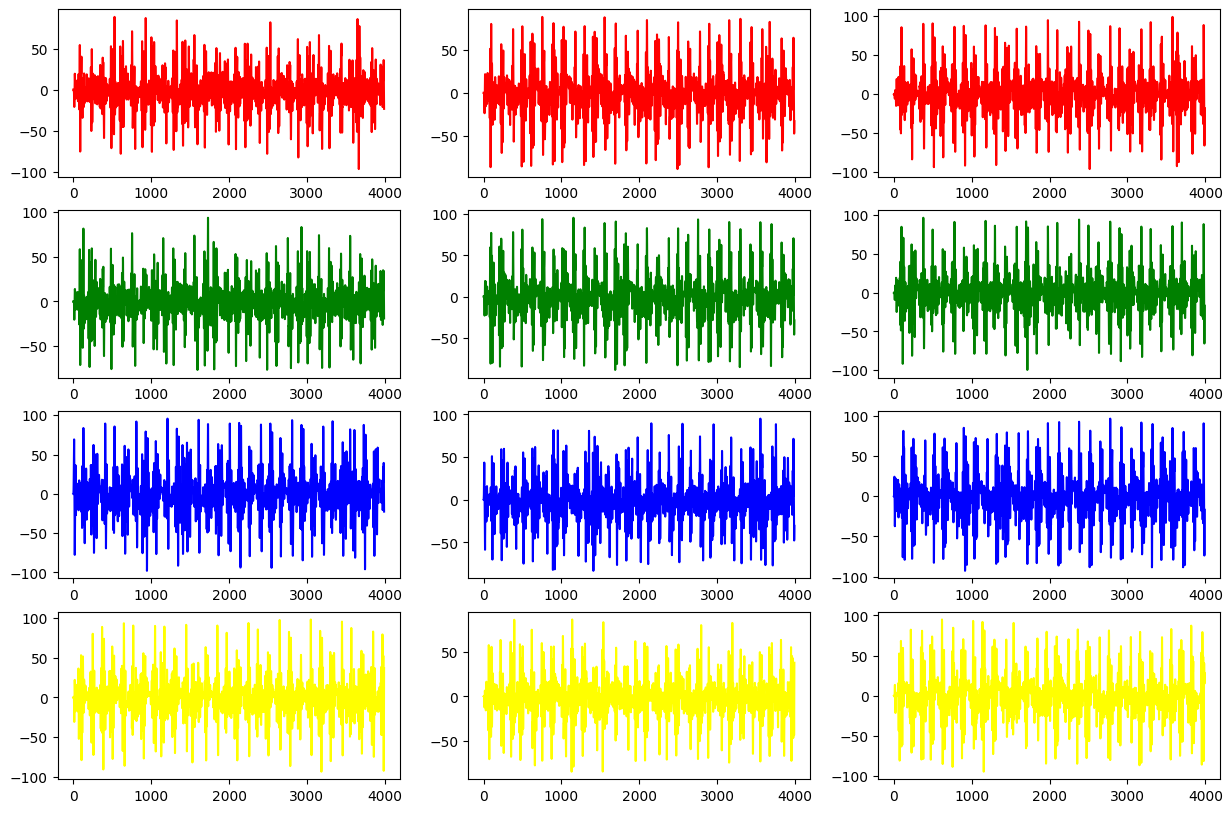

In [14]:
graficar_canales(señal1=arribaF,señal2=derechaF,señal3=abajoF, señal4= izquierdaF)

BANCO DE FILTROS

In [15]:
# Filtro 1

arribaF1 = []
derechaF1 = []
abajoF1 = []
izquierdaF1 = []

fs = 250
lowcut = 5.6
highcut = 7.6
cannal_0_fA1=butter_bandpass_filter(arribaF[0] , lowcut, highcut, fs,order=6)
cannal_1_fA1=butter_bandpass_filter(arribaF[1] , lowcut, highcut, fs,order=6)
cannal_2_fA1=butter_bandpass_filter(arribaF[2] , lowcut, highcut, fs,order=6)

cannal_0_fD1=butter_bandpass_filter(derechaF[0] , lowcut, highcut, fs,order=6)
cannal_1_fD1=butter_bandpass_filter(derechaF[1] , lowcut, highcut, fs,order=6)
cannal_2_fD1=butter_bandpass_filter(derechaF[2] , lowcut, highcut, fs,order=6)

cannal_0_fB1=butter_bandpass_filter(abajoF[0] , lowcut, highcut, fs,order=6)
cannal_1_fB1=butter_bandpass_filter(abajoF[1] , lowcut, highcut, fs,order=6)
cannal_2_fB1=butter_bandpass_filter(abajoF[2] , lowcut, highcut, fs,order=6)

cannal_0_fI1=butter_bandpass_filter(izquierdaF[0] , lowcut, highcut, fs,order=6)
cannal_1_fI1=butter_bandpass_filter(izquierdaF[1] , lowcut, highcut, fs,order=6)
cannal_2_fI1=butter_bandpass_filter(izquierdaF[2] , lowcut, highcut, fs,order=6)

arribaF1 = np.vstack((cannal_0_fA1, cannal_1_fA1,cannal_2_fA1))
derechaF1 = np.vstack((cannal_0_fD1, cannal_1_fD1,cannal_2_fD1))
abajoF1 = np.vstack((cannal_0_fB1, cannal_1_fB1,cannal_2_fB1))
izquierdaF1 = np.vstack((cannal_0_fI1, cannal_1_fI1,cannal_2_fI1))

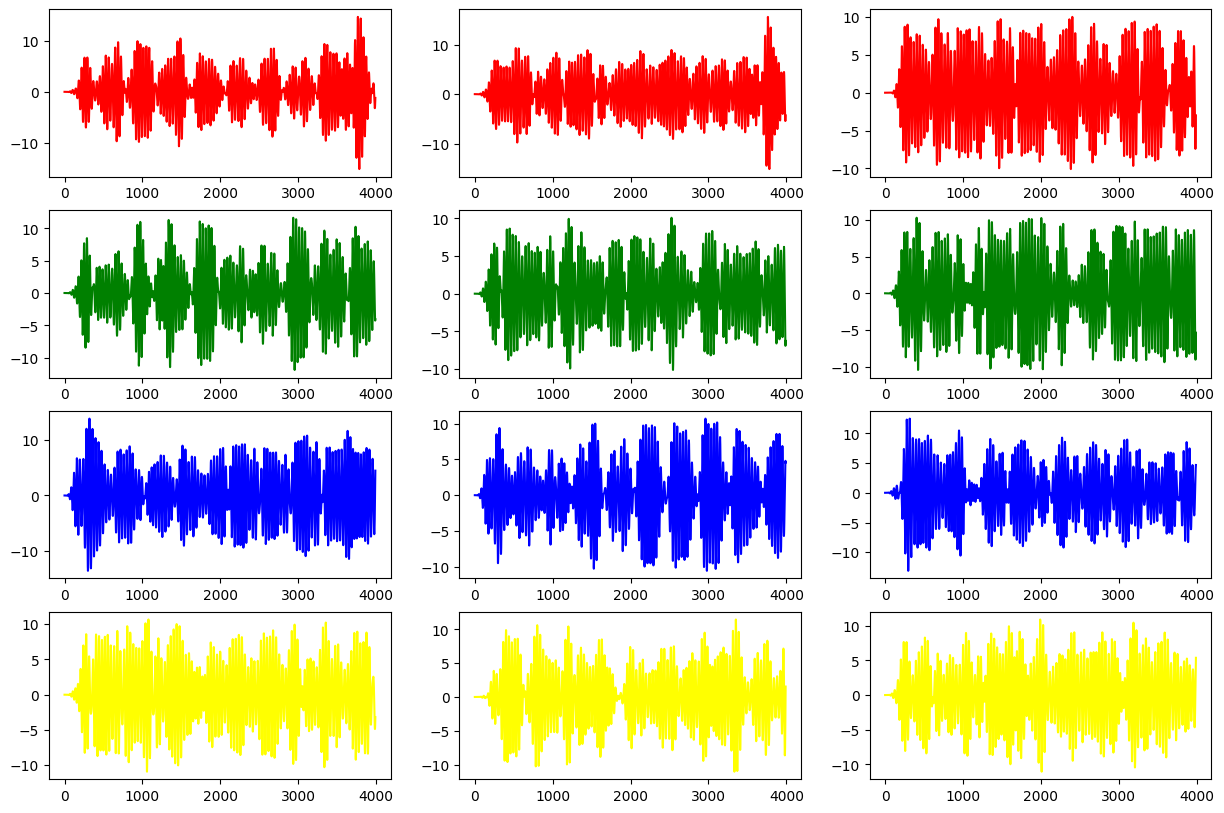

In [16]:
graficar_canales(señal1=arribaF1,señal2=derechaF1,señal3=abajoF1, señal4= izquierdaF1)

In [31]:
# Filtro 2

arribaF2 = []
derechaF2 = []
abajoF2 = []
izquierdaF2 = []

fs = 250
lowcut = 6.5
highcut = 8.5
cannal_0_fA2=butter_bandpass_filter(arribaF[0] , lowcut, highcut, fs,order=6)
cannal_1_fA2=butter_bandpass_filter(arribaF[1] , lowcut, highcut, fs,order=6)
cannal_2_fA2=butter_bandpass_filter(arribaF[2] , lowcut, highcut, fs,order=6)

cannal_0_fD2=butter_bandpass_filter(derechaF[0] , lowcut, highcut, fs,order=6)
cannal_1_fD2=butter_bandpass_filter(derechaF[1] , lowcut, highcut, fs,order=6)
cannal_2_fD2=butter_bandpass_filter(derechaF[2] , lowcut, highcut, fs,order=6)

cannal_0_fB2=butter_bandpass_filter(abajoF[0] , lowcut, highcut, fs,order=6)
cannal_1_fB2=butter_bandpass_filter(abajoF[1] , lowcut, highcut, fs,order=6)
cannal_2_fB2=butter_bandpass_filter(abajoF[2] , lowcut, highcut, fs,order=6)

cannal_0_fI2=butter_bandpass_filter(izquierdaF[0] , lowcut, highcut, fs,order=6)
cannal_1_fI2=butter_bandpass_filter(izquierdaF[1] , lowcut, highcut, fs,order=6)
cannal_2_fI2=butter_bandpass_filter(izquierdaF[2] , lowcut, highcut, fs,order=6)

arribaF2 = np.vstack((cannal_0_fA2, cannal_1_fA2,cannal_2_fA2))
derechaF2 = np.vstack((cannal_0_fD2, cannal_1_fD2,cannal_2_fD2))
abajoF2 = np.vstack((cannal_0_fB2, cannal_1_fB2,cannal_2_fB2))
izquierdaF2 = np.vstack((cannal_0_fI2, cannal_1_fI2,cannal_2_fI2))

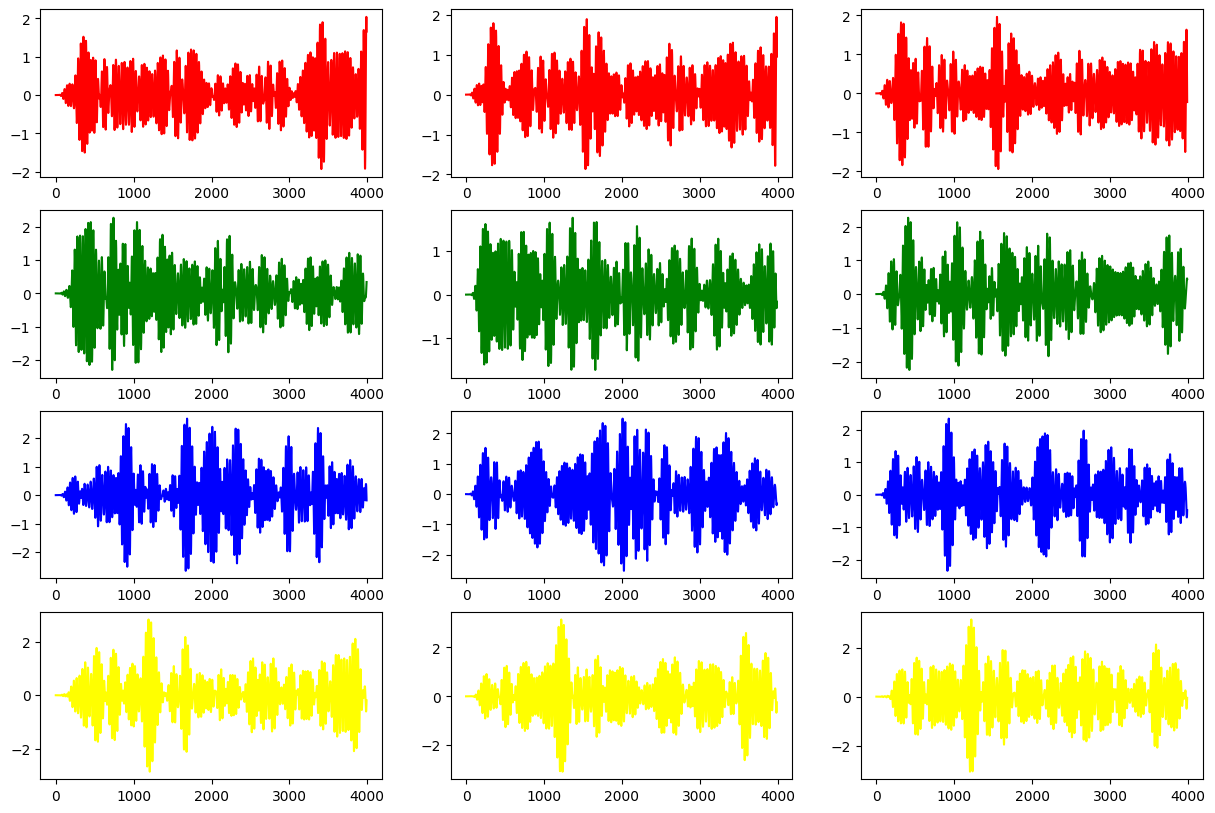

In [32]:
graficar_canales(señal1=arribaF2,señal2=derechaF2,señal3=abajoF2, señal4= izquierdaF2)

In [33]:
# Filtro 3

arribaF3 = []
derechaF3 = []
abajoF3 = []
izquierdaF3 = []

fs = 250
lowcut = 7.9
highcut = 9.5

cannal_0_fA3=butter_bandpass_filter(arribaF[0] , lowcut, highcut, fs,order=6)
cannal_1_fA3=butter_bandpass_filter(arribaF[1] , lowcut, highcut, fs,order=6)
cannal_2_fA3=butter_bandpass_filter(arribaF[2] , lowcut, highcut, fs,order=6)

cannal_0_fD3=butter_bandpass_filter(derechaF[0] , lowcut, highcut, fs,order=6)
cannal_1_fD3=butter_bandpass_filter(derechaF[1] , lowcut, highcut, fs,order=6)
cannal_2_fD3=butter_bandpass_filter(derechaF[2] , lowcut, highcut, fs,order=6)

cannal_0_fB3=butter_bandpass_filter(abajoF[0] , lowcut, highcut, fs,order=6)
cannal_1_fB3=butter_bandpass_filter(abajoF[1] , lowcut, highcut, fs,order=6)
cannal_2_fB3=butter_bandpass_filter(abajoF[2] , lowcut, highcut, fs,order=6)

cannal_0_fI3=butter_bandpass_filter(izquierdaF[0] , lowcut, highcut, fs,order=6)
cannal_1_fI3=butter_bandpass_filter(izquierdaF[1] , lowcut, highcut, fs,order=6)
cannal_2_fI3=butter_bandpass_filter(izquierdaF[2] , lowcut, highcut, fs,order=6)

arribaF3 = np.vstack((cannal_0_fA3, cannal_1_fA3,cannal_2_fA3))
derechaF3 = np.vstack((cannal_0_fD3, cannal_1_fD3,cannal_2_fD3))
abajoF3 = np.vstack((cannal_0_fB3, cannal_1_fB3,cannal_2_fB3))
izquierdaF3 = np.vstack((cannal_0_fI3, cannal_1_fI3,cannal_2_fI3))

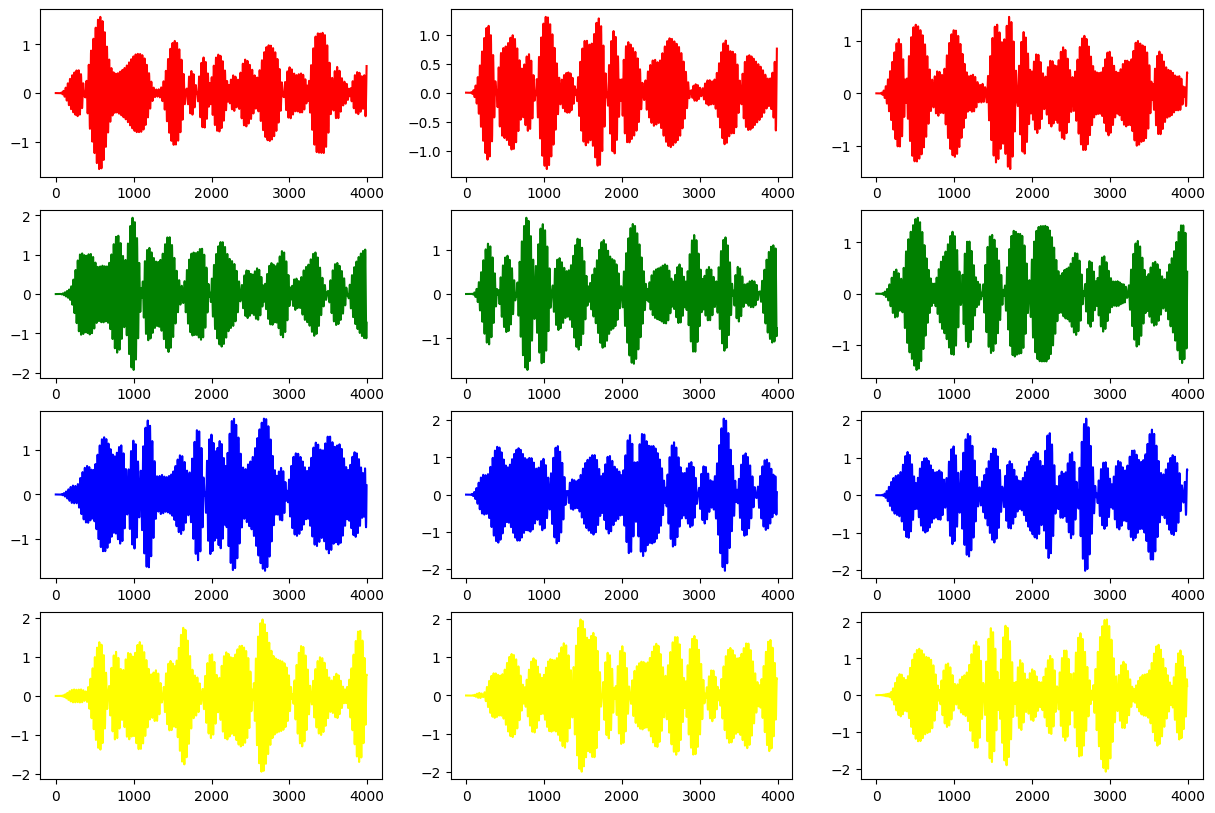

In [34]:
graficar_canales(señal1=arribaF3,señal2=derechaF3,señal3=abajoF3, señal4= izquierdaF3)

In [35]:
# Filtro 4
arribaF4 = []
derechaF4 = []
abajoF4 = []
izquierdaF4 = []

fs = 250
lowcut = 9
highcut = 11

cannal_0_fA4=butter_bandpass_filter(arribaF[0] , lowcut, highcut, fs,order=6)
cannal_1_fA4=butter_bandpass_filter(arribaF[1] , lowcut, highcut, fs,order=6)
cannal_2_fA4=butter_bandpass_filter(arribaF[2] , lowcut, highcut, fs,order=6)

cannal_0_fD4=butter_bandpass_filter(derechaF[0] , lowcut, highcut, fs,order=6)
cannal_1_fD4=butter_bandpass_filter(derechaF[1] , lowcut, highcut, fs,order=6)
cannal_2_fD4=butter_bandpass_filter(derechaF[2] , lowcut, highcut, fs,order=6)

cannal_0_fB4=butter_bandpass_filter(abajoF[0] , lowcut, highcut, fs,order=6)
cannal_1_fB4=butter_bandpass_filter(abajoF[1] , lowcut, highcut, fs,order=6)
cannal_2_fB4=butter_bandpass_filter(abajoF[2] , lowcut, highcut, fs,order=6)

cannal_0_fI4=butter_bandpass_filter(izquierdaF[0] , lowcut, highcut, fs,order=6)
cannal_1_fI4=butter_bandpass_filter(izquierdaF[1] , lowcut, highcut, fs,order=6)
cannal_2_fI4=butter_bandpass_filter(izquierdaF[2] , lowcut, highcut, fs,order=6)

arribaF4 = np.vstack((cannal_0_fA4, cannal_1_fA4,cannal_2_fA4))
derechaF4 = np.vstack((cannal_0_fD4, cannal_1_fD4,cannal_2_fD4))
abajoF4 = np.vstack((cannal_0_fB4, cannal_1_fB4,cannal_2_fB4))
izquierdaF4 = np.vstack((cannal_0_fI4, cannal_1_fI4,cannal_2_fI4))

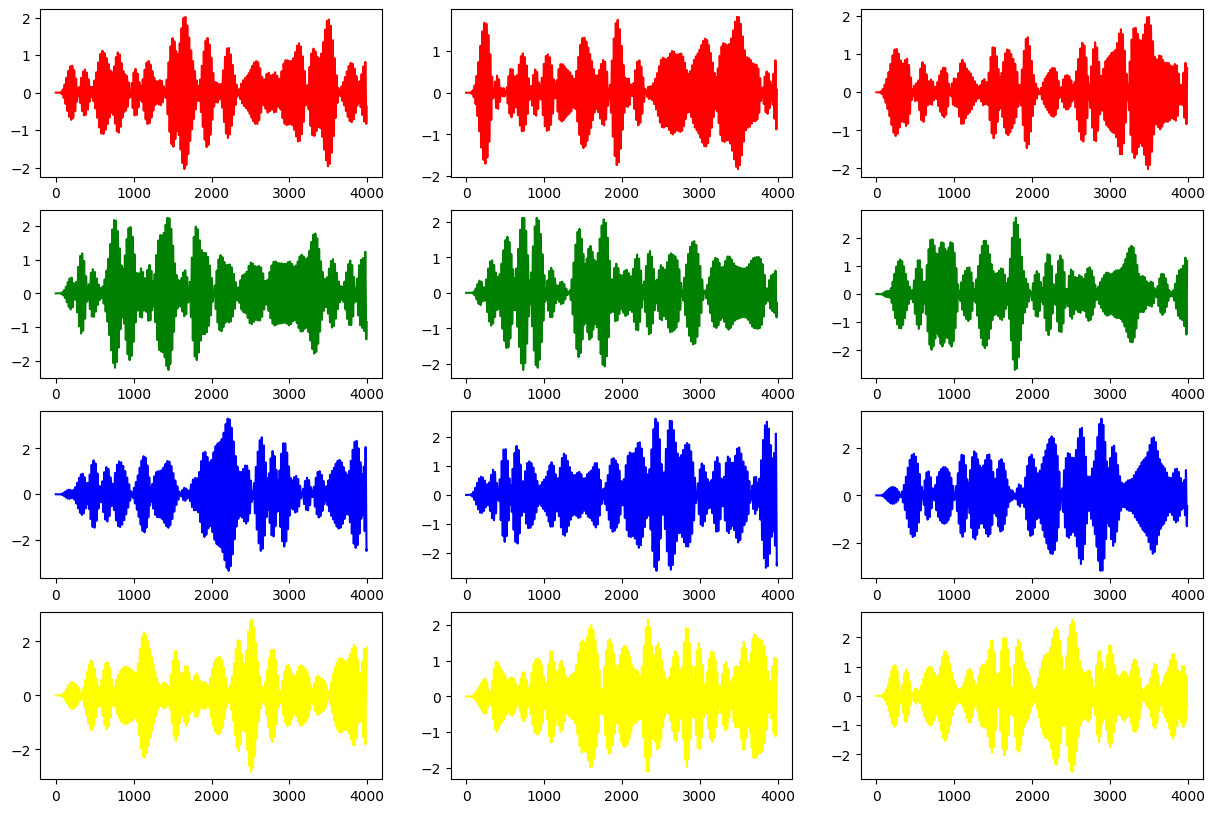

In [36]:
graficar_canales(señal1=arribaF4,señal2=derechaF4,señal3=abajoF4, señal4= izquierdaF4)

TRANSFORMADA DE FOURIER

In [17]:
arribaF1f = []
derechaF1f = []
abajoF1f = []
izquierdaF1f = []

cannal_0_fA1f = fft(arribaF1[0])
cannal_1_fA1f = fft(arribaF1[1])
cannal_2_fA1f = fft(arribaF1[2])

cannal_0_fD1f = fft(derechaF1[0])
cannal_1_fD1f = fft(derechaF1[1])
cannal_2_fD1f = fft(derechaF1[2])

cannal_0_fB1f = fft(abajoF1[0])
cannal_1_fB1f = fft(abajoF1[1])
cannal_2_fB1f = fft(abajoF1[2])

cannal_0_fI1f = fft(izquierdaF1[0])
cannal_1_fI1f = fft(izquierdaF1[1])
cannal_2_fI1f = fft(izquierdaF1[2])

arribaF1f = np.vstack((cannal_0_fA1f, cannal_1_fA1f,cannal_2_fA1f))
derechaF1f = np.vstack((cannal_0_fD1f, cannal_1_fD1f,cannal_2_fD1f))
abajoF1f = np.vstack((cannal_0_fB1f, cannal_1_fB1f,cannal_2_fB1f))
izquierdaF1f = np.vstack((cannal_0_fI1f, cannal_1_fI1f,cannal_2_fI1f))


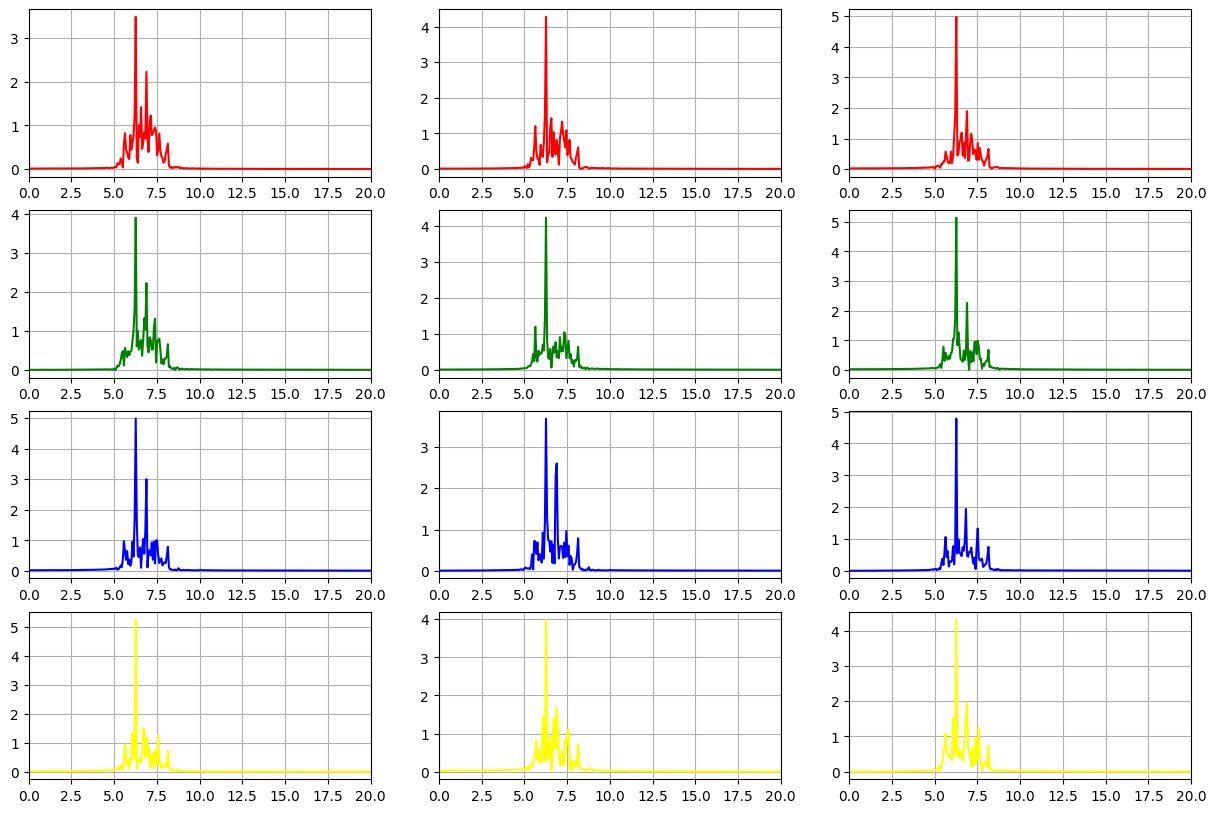

In [18]:
fig = plt.figure(figsize=(15,10))
fig.tight_layout()

T = 1 / 250
L=len(cannal_0_fA1f)
xf1 = np.linspace(0.0, 1.0/(2.0*T), L//2)


color =['','red','green','blue','yellow']

for i in range(1,4):
    ax = plt.subplot(4,3,i)
    ax.plot(xf1, 2.0/L * np.abs(arribaF1f[i-1][0:L//2]), color=color[1]),plt.grid()
    ax.set_xlim([0,20])

    ax = plt.subplot(4,3,i+3)
    ax.plot(xf1, 2.0/L * np.abs(derechaF1f[i-1][0:L//2]), color=color[2]),plt.grid()
    ax.set_xlim([0,20])

    ax = plt.subplot(4,3,i+6)
    ax.plot(xf1, 2.0/L * np.abs(abajoF1f[i-1][0:L//2]), color=color[3]),plt.grid()
    ax.set_xlim([0,20])

    ax = plt.subplot(4,3,i+9)
    ax.plot(xf1, 2.0/L * np.abs(izquierdaF1f[i-1][0:L//2]), color=color[4]),plt.grid()
    ax.set_xlim([0,20])

In [57]:
arribaF2f = []
derechaF2f = []
abajoF2f = []
izquierdaF2f = []

cannal_0_fA2f = fft(arribaF2[0])
cannal_1_fA2f = fft(arribaF2[1])
cannal_2_fA2f = fft(arribaF2[2])

cannal_0_fD2f = fft(derechaF2[0])
cannal_1_fD2f = fft(derechaF2[1])
cannal_2_fD2f = fft(derechaF2[2])

cannal_0_fB2f = fft(abajoF2[0])
cannal_1_fB2f = fft(abajoF2[1])
cannal_2_fB2f = fft(abajoF2[2])

cannal_0_fI2f = fft(izquierdaF2[0])
cannal_1_fI2f = fft(izquierdaF2[1])
cannal_2_fI2f = fft(izquierdaF2[2])

arribaF2f = np.vstack((cannal_0_fA2f, cannal_1_fA2f,cannal_2_fA2f))
derechaF2f = np.vstack((cannal_0_fD2f, cannal_1_fD2f,cannal_2_fD2f))
abajoF2f = np.vstack((cannal_0_fB2f, cannal_1_fB2f,cannal_2_fB2f))
izquierdaF2f = np.vstack((cannal_0_fI2f, cannal_1_fI2f,cannal_2_fI2f))


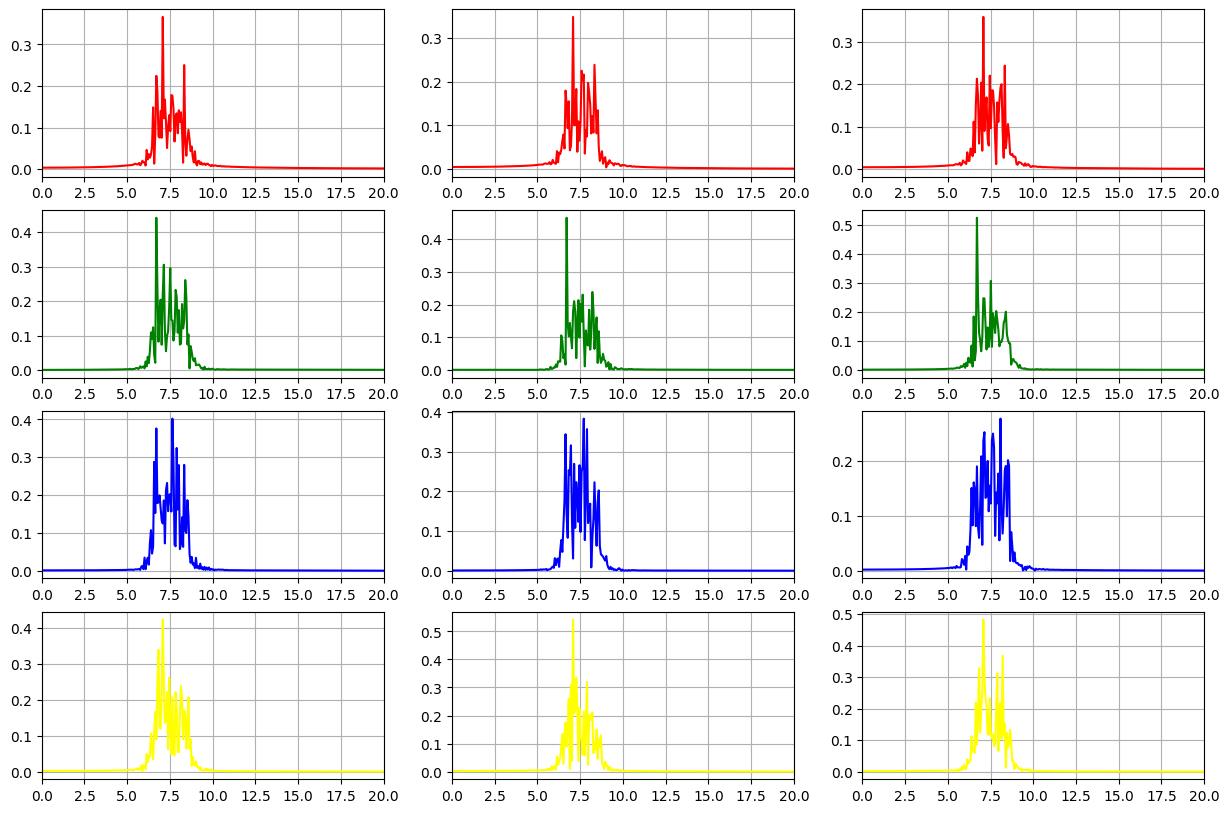

In [58]:
fig = plt.figure(figsize=(15,10))
fig.tight_layout()

T = 1 / 250
L=len(cannal_0_fA2f)
xf1 = np.linspace(0.0, 1.0/(2.0*T), L//2)


color =['','red','green','blue','yellow']

for i in range(1,4):
    ax = plt.subplot(4,3,i)
    ax.plot(xf1, 2.0/L * np.abs(arribaF2f[i-1][0:L//2]), color=color[1]),plt.grid()
    ax.set_xlim([0,20])

    ax = plt.subplot(4,3,i+3)
    ax.plot(xf1, 2.0/L * np.abs(derechaF2f[i-1][0:L//2]), color=color[2]),plt.grid()
    ax.set_xlim([0,20])

    ax = plt.subplot(4,3,i+6)
    ax.plot(xf1, 2.0/L * np.abs(abajoF2f[i-1][0:L//2]), color=color[3]),plt.grid()
    ax.set_xlim([0,20])

    ax = plt.subplot(4,3,i+9)
    ax.plot(xf1, 2.0/L * np.abs(izquierdaF2f[i-1][0:L//2]), color=color[4]),plt.grid()
    ax.set_xlim([0,20])

In [59]:
arribaF3f = []
derechaF3f = []
abajoF3f = []
izquierdaF3f = []

cannal_0_fA3f = fft(arribaF3[0])
cannal_1_fA3f = fft(arribaF3[1])
cannal_2_fA3f = fft(arribaF3[2])

cannal_0_fD3f = fft(derechaF3[0])
cannal_1_fD3f = fft(derechaF3[1])
cannal_2_fD3f = fft(derechaF3[2])

cannal_0_fB3f = fft(abajoF3[0])
cannal_1_fB3f = fft(abajoF3[1])
cannal_2_fB3f = fft(abajoF3[2])

cannal_0_fI3f = fft(izquierdaF3[0])
cannal_1_fI3f = fft(izquierdaF3[1])
cannal_2_fI3f = fft(izquierdaF3[2])

arribaF3f = np.vstack((cannal_0_fA3f, cannal_1_fA3f,cannal_2_fA3f))
derechaF3f = np.vstack((cannal_0_fD3f, cannal_1_fD3f,cannal_2_fD3f))
abajoF3f = np.vstack((cannal_0_fB3f, cannal_1_fB3f,cannal_2_fB3f))
izquierdaF3f = np.vstack((cannal_0_fI3f, cannal_1_fI3f,cannal_2_fI3f))

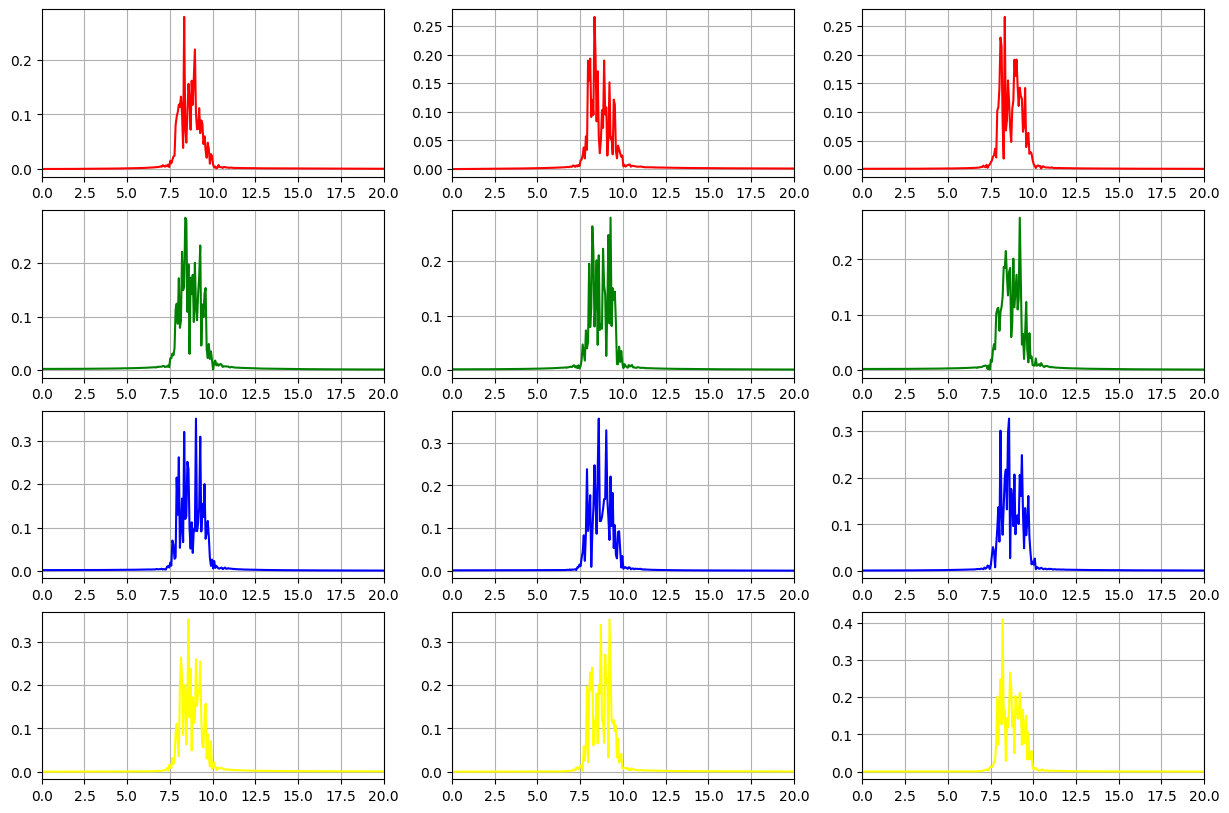

In [60]:
fig = plt.figure(figsize=(15,10))
fig.tight_layout()

T = 1 / 250
L=len(cannal_0_fA3f)
xf1 = np.linspace(0.0, 1.0/(2.0*T), L//2)


color =['','red','green','blue','yellow']

for i in range(1,4):
    ax = plt.subplot(4,3,i)
    ax.plot(xf1, 2.0/L * np.abs(arribaF3f[i-1][0:L//2]), color=color[1]),plt.grid()
    ax.set_xlim([0,20])

    ax = plt.subplot(4,3,i+3)
    ax.plot(xf1, 2.0/L * np.abs(derechaF3f[i-1][0:L//2]), color=color[2]),plt.grid()
    ax.set_xlim([0,20])

    ax = plt.subplot(4,3,i+6)
    ax.plot(xf1, 2.0/L * np.abs(abajoF3f[i-1][0:L//2]), color=color[3]),plt.grid()
    ax.set_xlim([0,20])

    ax = plt.subplot(4,3,i+9)
    ax.plot(xf1, 2.0/L * np.abs(izquierdaF3f[i-1][0:L//2]), color=color[4]),plt.grid()
    ax.set_xlim([0,20])

In [61]:
arribaF4f = []
derechaF4f = []
abajoF4f = []
izquierdaF4f = []

cannal_0_fA4f = fft(arribaF4[0])
cannal_1_fA4f = fft(arribaF4[1])
cannal_2_fA4f = fft(arribaF4[2])

cannal_0_fD4f = fft(derechaF4[0])
cannal_1_fD4f = fft(derechaF4[1])
cannal_2_fD4f = fft(derechaF4[2])

cannal_0_fB4f = fft(abajoF4[0])
cannal_1_fB4f = fft(abajoF4[1])
cannal_2_fB4f = fft(abajoF4[2])

cannal_0_fI4f = fft(izquierdaF4[0])
cannal_1_fI4f = fft(izquierdaF4[1])
cannal_2_fI4f = fft(izquierdaF4[2])

arribaF4f = np.vstack((cannal_0_fA4f, cannal_1_fA4f,cannal_2_fA4f))
derechaF4f = np.vstack((cannal_0_fD4f, cannal_1_fD4f,cannal_2_fD4f))
abajoF4f = np.vstack((cannal_0_fB4f, cannal_1_fB4f,cannal_2_fB4f))
izquierdaF4f = np.vstack((cannal_0_fI4f, cannal_1_fI4f,cannal_2_fI4f))

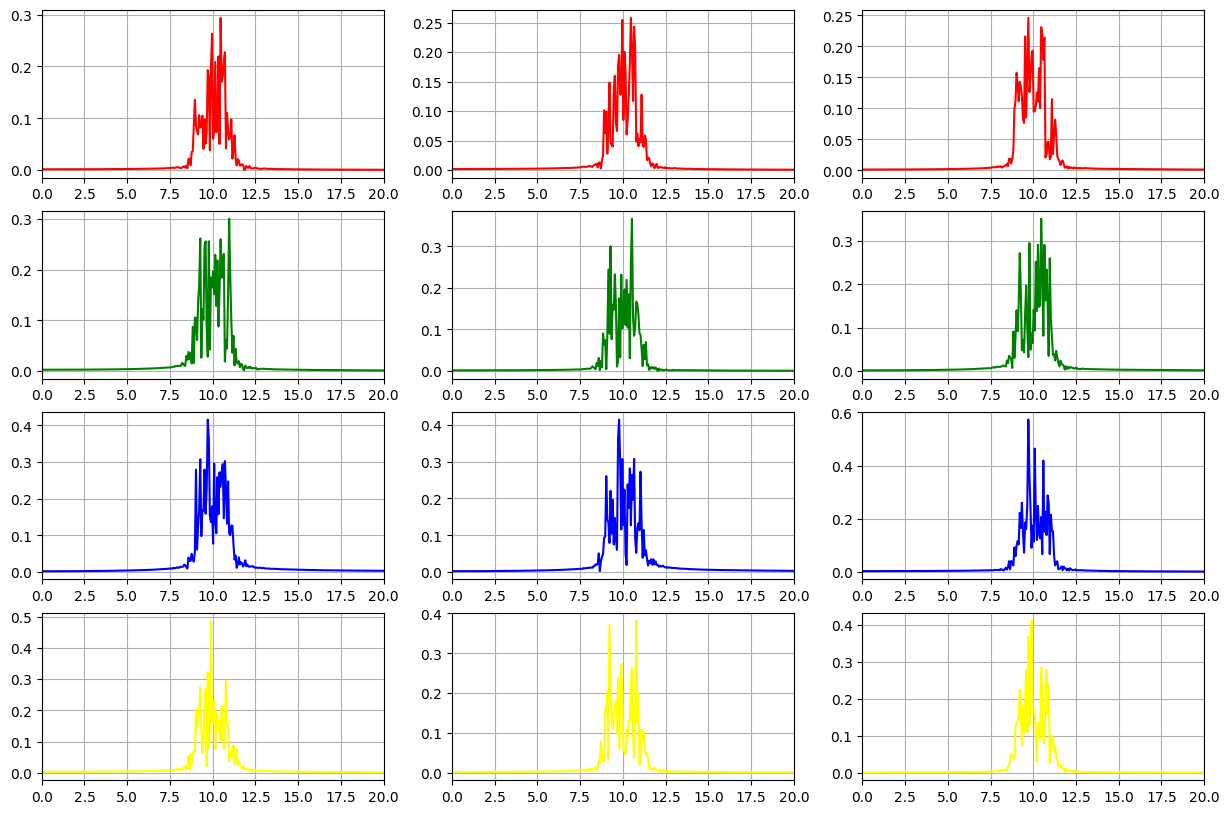

In [62]:
fig = plt.figure(figsize=(15,10))
fig.tight_layout()

T = 1 / 250
L=len(cannal_0_fA1f)
xf1 = np.linspace(0.0, 1.0/(2.0*T), L//2)


color =['','red','green','blue','yellow']

for i in range(1,4):
    ax = plt.subplot(4,3,i)
    ax.plot(xf1, 2.0/L * np.abs(arribaF4f[i-1][0:L//2]), color=color[1]),plt.grid()
    ax.set_xlim([0,20])

    ax = plt.subplot(4,3,i+3)
    ax.plot(xf1, 2.0/L * np.abs(derechaF4f[i-1][0:L//2]), color=color[2]),plt.grid()
    ax.set_xlim([0,20])

    ax = plt.subplot(4,3,i+6)
    ax.plot(xf1, 2.0/L * np.abs(abajoF4f[i-1][0:L//2]), color=color[3]),plt.grid()
    ax.set_xlim([0,20])

    ax = plt.subplot(4,3,i+9)
    ax.plot(xf1, 2.0/L * np.abs(izquierdaF4f[i-1][0:L//2]), color=color[4]),plt.grid()
    ax.set_xlim([0,20])

POTENCIA DE LA SEÑAL 

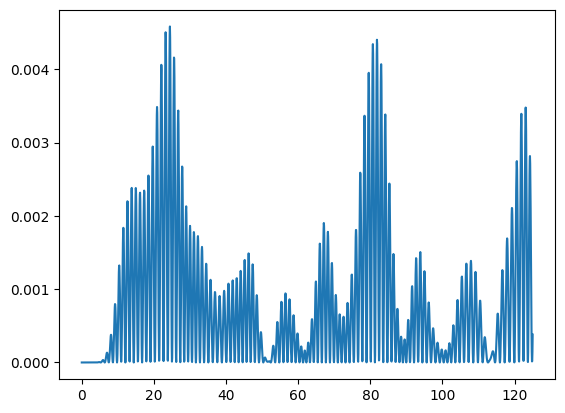

In [146]:

T = 1 / 250
L=len(cannal_0_fA1)
xf1 = np.linspace(0.0, 1.0/(2.0*T), L//2)

power_spectrum = np.square(np.abs(arribaF1[0]))
plt.plot(xf1, 2.0/L * np.abs(power_spectrum[0:L//2]))


In [ ]:
fig = plt.figure(figsize=(15,5))
fig.tight_layout()

yf1 = fft(cannal_0_f1)
yf2 = fft(cannal_1_f1)
yf3 = fft(cannal_2_f1)

L=len(cannal_0_f1)
T = 1 / 250

xf1 = np.linspace(0.0, 1.0/(2.0*T), L//2)

ax = plt.subplot(1,3,1)
ax.plot(xf1, 2.0/L * np.abs(yf1[0:L//2]), color='red')

ax = plt.subplot(1,3,2)
ax.plot(xf1, 2.0/L * np.abs(yf2[0:L//2]), color='green')

ax = plt.subplot(1,3,3)
ax.plot(xf1, 2.0/L * np.abs(yf2[0:L//2]), color='blue')

In [ ]:
fig = plt.figure(figsize=(15,5))
fig.tight_layout()

yf1 = fft(cannal_0_f2)
yf2 = fft(cannal_1_f2)
yf3 = fft(cannal_2_f2)

L=len(cannal_0_f2)
T = 1 / 250

xf1 = np.linspace(0.0, 1.0/(2.0*T), L//2)

ax = plt.subplot(1,3,1)
ax.plot(xf1, 2.0/L * np.abs(yf1[0:L//2]), color='red')

ax = plt.subplot(1,3,2)
ax.plot(xf1, 2.0/L * np.abs(yf2[0:L//2]), color='green')

ax = plt.subplot(1,3,3)
ax.plot(xf1, 2.0/L * np.abs(yf2[0:L//2]), color='blue')

In [ ]:
fig = plt.figure(figsize=(15,5))
fig.tight_layout()

yf1 = fft(cannal_0_f3)
yf2 = fft(cannal_1_f3)
yf3 = fft(cannal_2_f3)

L=len(cannal_0_f3)
T = 1 / 250

xf1 = np.linspace(0.0, 1.0/(2.0*T), L//2)

ax = plt.subplot(1,3,1)
ax.plot(xf1, 2.0/L * np.abs(yf1[0:L//2]), color='red')

ax = plt.subplot(1,3,2)
ax.plot(xf1, 2.0/L * np.abs(yf2[0:L//2]), color='green')

ax = plt.subplot(1,3,3)
ax.plot(xf1, 2.0/L * np.abs(yf2[0:L//2]), color='blue')

In [ ]:
fig = plt.figure(figsize=(15,5))
fig.tight_layout()

yf1 = fft(cannal_0_f4)
yf2 = fft(cannal_1_f4)
yf3 = fft(cannal_2_f4)

L=len(cannal_0_f4)
T = 1 / 250

xf1 = np.linspace(0.0, 1.0/(2.0*T), L//2)

ax = plt.subplot(1,3,1)
ax.plot(xf1, 2.0/L * np.abs(yf1[0:L//2]), color='red')

ax = plt.subplot(1,3,2)
ax.plot(xf1, 2.0/L * np.abs(yf2[0:L//2]), color='green')

ax = plt.subplot(1,3,3)
ax.plot(xf1, 2.0/L * np.abs(yf2[0:L//2]), color='blue')